# Precision, Recall and F1 Score
**Credit:** 
* https://www.youtube.com/watch?v=2osIZ-dSPGE&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=20
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#
* https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

## Some theory
### Recall:
The ability of a model to find all the relevant cases within a data set. Mathematically, we define recall as **the number of true positives divided by the number of true positives plus the number of false negatives.**
### Precision: 
The ability of a classification model to identify only the relevant data points. Mathematically, precision is **the number of true positives divided by the number of true positives plus the number of false positives.**
* **True positives** <font color='gray'>are data points classified as positive by the model that actually are positive (meaning they are correct),<br>
* **False negatives** <font color='gray'>are data points the model identifies as negative that actually are positive (incorrect).

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sb
import pandas as pd

In [2]:
truth =      ["Dog","Not a dog","Dog","Dog",      "Dog", "Not a dog", "Not a dog", "Dog",       "Dog", "Not a dog"]
prediction = ["Dog","Dog",      "Dog","Not a dog","Dog", "Not a dog", "Dog",       "Not a dog", "Dog", "Dog"]

## Let's visulaize the above dataset

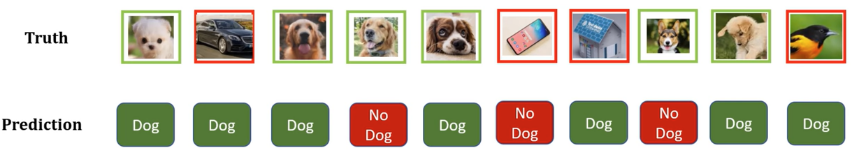

#### What are we searching here? 
### Dog... right. So, 
number of dog prediction as true(right) is **True positive** and <br>
number of dog prediction as false(wrong) is **False positive**

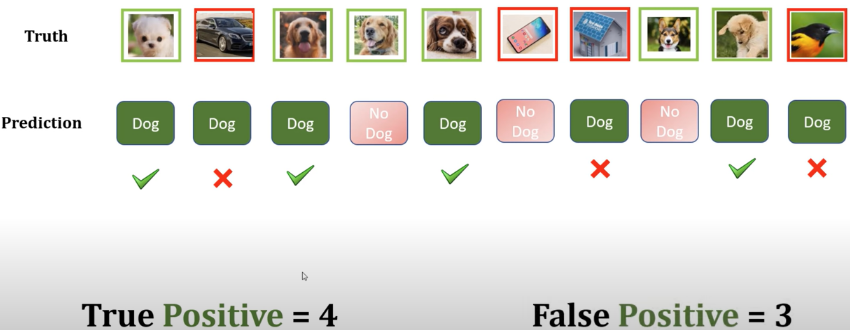

#### What are we searching here? 
### No Dog... right. So, 
number of No Dog prediction as true(right) is **True negative** and <br>
number of No Dog prediction as false(wrong) is **False negative**

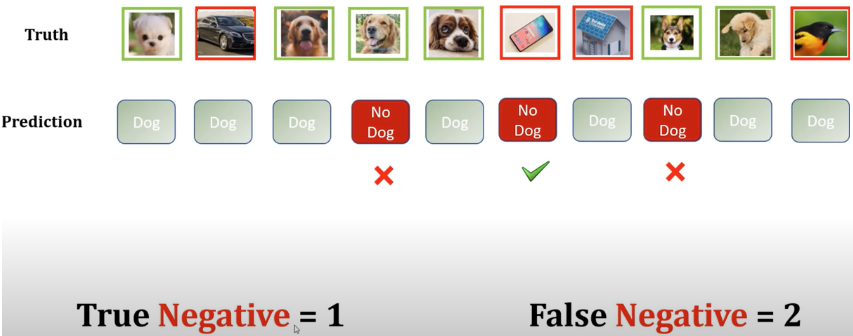

### How many predictions we got right(correct) either as Dog (True Positive) or No Dog (True Negative)

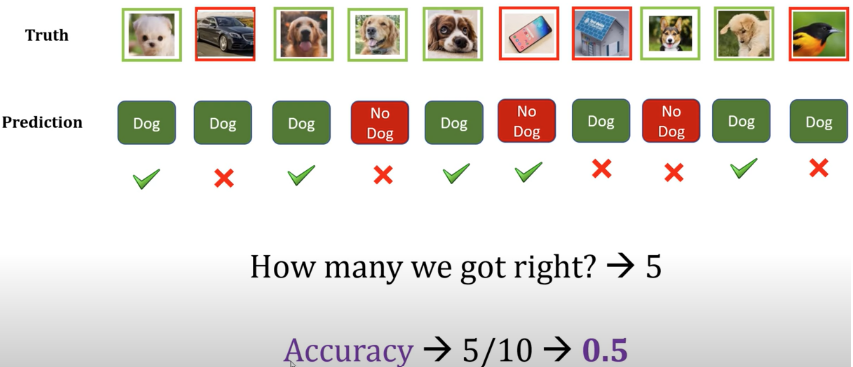

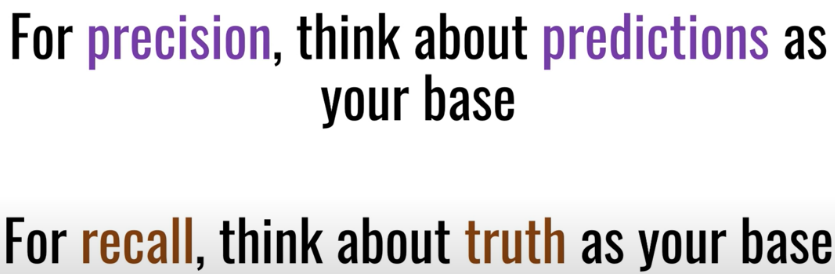

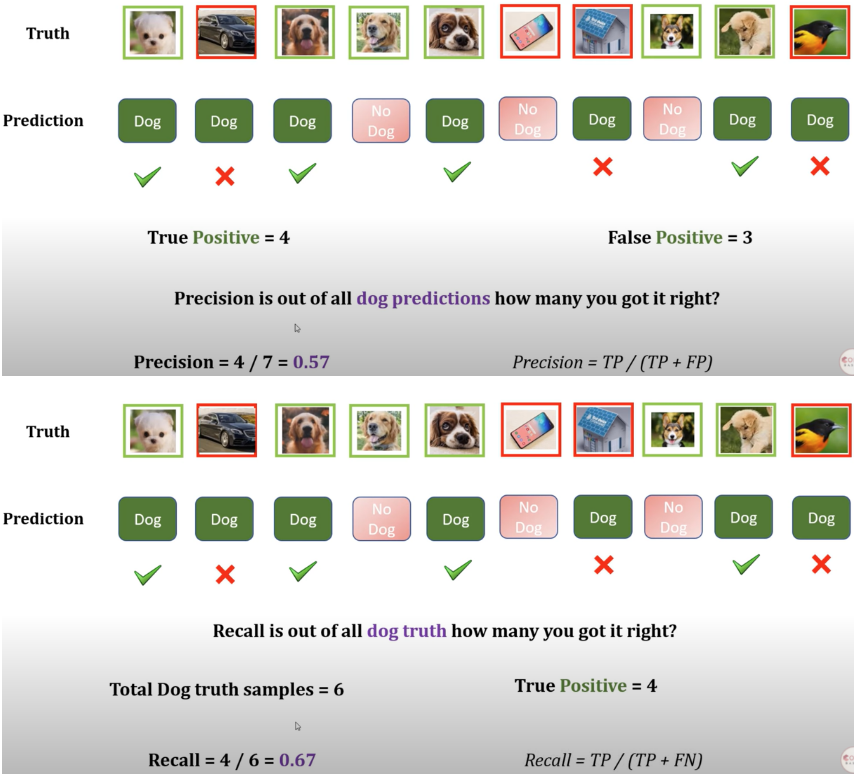

## pandas.DataFrame
### class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels. Can be thought of as a dict-like container for Series objects. The primary pandas data structure.

**data :** ndarray (structured or homogeneous), Iterable, dict, or DataFrame
Dict can contain Series, arrays, constants, dataclass or list-like objects. If data is a dict, column order follows insertion-order. If a dict contains Series which have an index defined, it is aligned by its index. This alignment also occurs if data is a Series or a DataFrame itself. Alignment is done on Series/DataFrame inputs.

If data is a list of dicts, column order follows insertion-order.

**index :** Index or array-like
Index to use for resulting frame. Will default to RangeIndex if no indexing information part of input data and no index provided.

**columns :** Index or array-like
Column labels to use for resulting frame when data does not have them, defaulting to RangeIndex(0, 1, 2, …, n). If data contains column labels, will perform column selection instead.

## seaborn.heatmap
#### seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

Plot a rectangular data as a color-encoded matrix.

**data :** rectangular dataset
2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

**annot :** bool or rectangular dataset, optional
If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

**fmt :** str, optional
String formatting code to use when adding annotations.

In [3]:
def print_confusion_matrix(conf_matrix, class_names, fig_size):
    
        # index & columns, both will print the name given by an array "truth & prediction" as "Dog" & "Not a Dog"
        df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)
        
        try:
            heatmap = sb.heatmap(df_cm, annot=True,)
        except ValueError:
            raise ValueError("Confusion matrix values must be integer.")
        
        heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=11)
        heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=11)
        
        plt.xlabel("Predicted", fontsize=14)
        plt.ylabel("True", fontsize=14)
    

SyntaxError: invalid syntax (2520929223.py, line 11)

Usage of confusion matrix is to evaluate the quality of the output of a classifier on the any data set. The diagonal elements represent the number of points for which the **predicted label is equal to the true label**, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

There are the confusion matrix with and without normalization by class support size (number of elements in each class). This kind of normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified.

### sklearn.metrics.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
Compute confusion matrix to evaluate the accuracy of a classification.

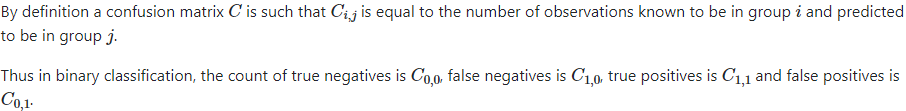

**y_true :** array-like of shape (n_samples,)
Ground truth (correct) target values.

**y_pred :** array-like of shape (n_samples,)
Estimated targets as returned by a classifier.

**labels :** array-like of shape (n_classes), default=None
List of labels to index the matrix. This may be used to reorder or select a subset of labels. If None is given, those that appear at least once in y_true or y_pred are used in sorted order.

**sample_weight :** array-like of shape (n_samples,), default=None
Sample weights.

### sklearn.metrics.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')
Build a text report showing the main classification metrics.

**y_true :** 1d array-like, or label indicator array / sparse matrix
Ground truth (correct) target values.

**y_pred :** 1d array-like, or label indicator array / sparse matrix
Estimated targets as returned by a classifier.

In [ ]:
class_names = ['Dog', 'Not a Dog']
cm = confusion_matrix(truth, prediction)
fig_size = (10, 7)
print_confusion_matrix(cm, class_names, fig_size)

print(classification_report(truth, prediction))

**___________________________________________________________________________________________________________________________**

## Total Predicted Positive = True Positive + False Positive

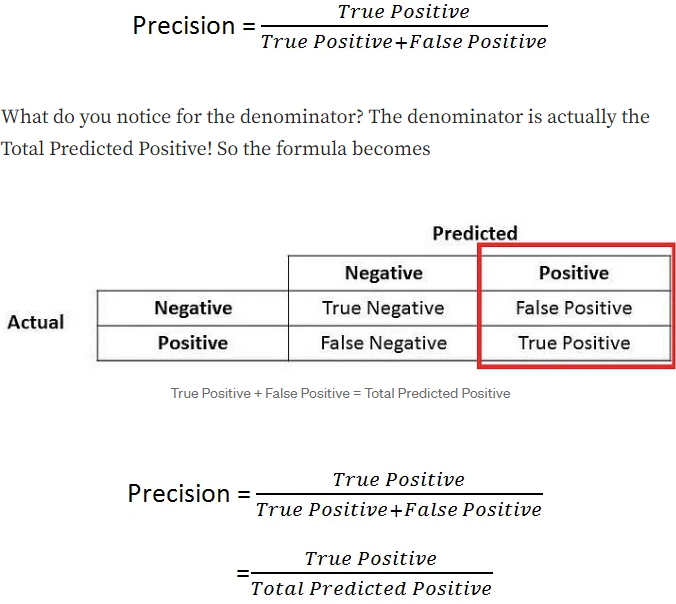

**___________________________________________________________________________________________________________________________**

## Total Actual Positive = True Positive + False Negative

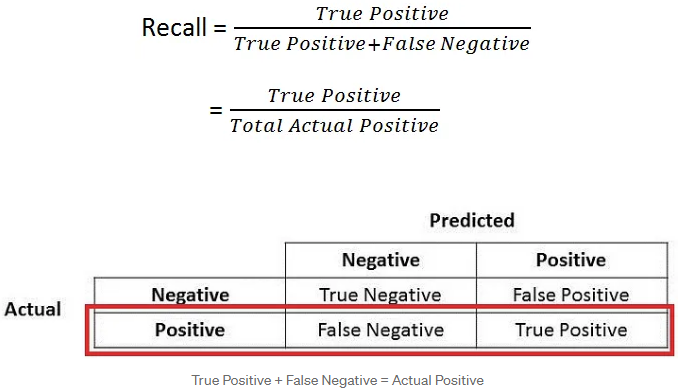

**___________________________________________________________________________________________________________________________**

## F1 Score
Now if you read a lot of other literature on Precision and Recall, you cannot avoid the other measure, F1 which is a function of Precision and Recall. Looking at [Wikipedia](https://en.wikipedia.org/wiki/F1_score#Formulation), the formula is as follows:

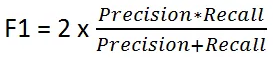

## F1 score for Dog class

In [ ]:
2 * (0.57 * 0.67 ) / (0.57 + 0.67 )

## F1 score for Not a Dog class

In [ ]:
2 * (0.33 * 0.25) / (0.33 + 0.25)